In [1]:
from __future__ import print_function
from tkinter import HORIZONTAL

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import cv2
import numpy as np
import tkinter as tk
import matplotlib
import matplotlib.pyplot as plt
import ReadImage


import rdflib as rdf
import pytesseract
import cv2
import os
from pathlib import Path


class ReadImage:

    def __init__(self):
        pass

    def read_file(self, pic, name, contours):
        i = 0
        j = 0
        directory = cwd_decider(r'../recognized_texts')
        os.chdir(directory)

        file = open("recognized_" + name + ".txt", "w+") 
        file.write("") 
        file.close() 
        pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
        x0, y0, w0, h0 = cv2.boundingRect(contours[0])
        
#         alter = pytesseract.image_to_string(pic, lang='hun', config='--psm 6')
#         hImg, wImg, _ = pic.shape
#         boxes = pytesseract.image_to_boxes(pic)
#         concatable = ""
#         for b in boxes.splitlines():
#             b = b.split(' ')
#             concatable += "".join(b[0])
#             x,y,w,h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
#             cv2.rectangle(pic, (x, hImg-y), (w, hImg-h), (0, 0, 255), 3)
#             cv2.putText(pic, b[0], (x, hImg-y+25), cv2.FONT_HERSHEY_COMPLEX, 1, (50, 50 ,255), 2)
            
#         print(concatable)

#         plt.imshow(pic)
#         plt.show()

        for cnt in contours: 
            x, y, w, h = cv2.boundingRect(cnt) 

            # Drawing a rectangle on copied image 
            rect = cv2.rectangle(pic, (x, y), (x + w, y + h), (0, 255, 0), 2) 

            # Cropping the text block for giving input to OCR 
            cropped = pic[y:y + h, x:x + w] 

            file = open("recognized_" + name + ".txt", "a")

            # Apply OCR on the cropped image 
            text = pytesseract.image_to_string(cropped, config='--psm 6')

        #     if text.isspace():
            plt.imshow(cropped)
        #     plt.show()
            print(text)

            while text.isspace():
                print("ok")
                drag_low_sat.value -= i
                change_arrays()
                show_img(pic, name) 
                text = pytesseract.image_to_string(pic[y:y + h + i, x:x + w + j], config='--psm 6')
                if not text.isspace() and y+h+i > y+h+(i-1):
                    i+=1
                if not text.isspace() and x+w+j > x+w+(j-1):
                    j+=1
            file.write(text) 
            if h0 < h:
                file.write("\n") 

            # Close the file 
            file.close 

            
    def encode(self, text):
        print(text)


        
def init_images():
    global img_array
    if os.getcwd() != r'c:\Users\Ricsi\PycharmProjects\szakdolgozat\ImageProcessing\src':
#         img_array = os.listdir("../../samples/images")
        _, _, img_array = next(os.walk("../../samples/images"))
        for i in range(len(img_array)):
            img_array[i] = "../../samples/images/" + img_array[i]
        return
#     img_array = os.listdir("../samples/images")
    _, _, img_array = next(os.walk("../samples/images"))
    for i in range(len(img_array)):
        img_array[i] = "../samples/images/" + img_array[i]

        
def cwd_decider(path):
    print(path)
    if os.getcwd() != r'c:\Users\Ricsi\PycharmProjects\szakdolgozat\ImageProcessing\src':
        return path
    return "../samples/" + path.replace("../", "")
        
print(os.getcwd())
img_array = []
# img_array = ["../../samples/images/Elohim.JPG", "../../samples/images/Egy hangon.JPG"]
init_images()
#     print(Path(img_array[i]).is_file(), '||' + img_array[i])
# print(img_array)
r = ReadImage()

drag_low_hue = widgets.IntSlider(description="Low HUE:", min=0, max=179, value=86)
drag_low_sat = widgets.IntSlider(description="Low Saturation:", min=0, max=255, value=144)
drag_low_bright = widgets.IntSlider(description="Low Brightness:", min=0, max=255, value=43)
drag_high_hue = widgets.IntSlider(description="High HUE:", min=0, max=179, value=135)
drag_high_sat = widgets.IntSlider(description="High Saturation:", min=0, max=255, value=255)
drag_high_bright = widgets.IntSlider(description="High Brightness:", min=0, max=255, value=255)

next_image_btn = widgets.Button(description="Next Image")
prev_image_btn = widgets.Button(description="Prev Image")
change_image_btn = widgets.Button(description="Change Image")


index = 0
low_blue_arr = [86, 144, 43]
high_blue_arr = [135, 255, 255]
isItThreshold = False


def show_img(this_img, imname):
    print(os.getcwd())
    directory = cwd_decider(r'../images/')
    os.chdir(directory) 
    
#     hsv = cv2.cvtColor(this_img, cv2.COLOR_BGR2HSV)
#     gray = cv2.cvtColor(this_img, cv2.COLOR_BGR2GRAY)
    lower_blue = np.array(low_blue_arr)
    upper_blue = np.array(high_blue_arr)

#     mask = cv2.inRange(hsv, lower_blue, upper_blue)
#     del_mask = cv2.inRange(hsv, np.array([0,0,0]), np.array([0,220,220]))
#     if not isItThreshold:
#         res = cv2.bitwise_or(this_img, this_img, mask=mask)
#     else:
#         ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
#         thresh = cv2.adaptiveThreshold(mask, 120, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 4)
#         res = cv2.bitwise_or(this_img, this_img, mask=mask)
#         res = cv2.bitwise_or(this_img, this_img, mask=thresh)
#         res = cv2.bitwise_not(this_img, this_img, mask=del_mask)

    title = img_array[index][21:]
    
    # Convert the image to gray scale 
    hsv = cv2.cvtColor(this_img, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Performing OTSU threshold 
    mask_inv = cv2.bitwise_not(mask)
    ret, thresh1 = cv2.threshold(mask, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY) 


    # Specify structure shape and kernel size.  
    # Kernel size increases or decreases the area  
    # of the rectangle to be detected. 
    # A smaller value like (10, 10) will detect  
    # each word instead of a sentence. 
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (28, 28)) 

    # Appplying dilation on the threshold image 
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 

    # Finding contours 
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) 

#     plt.imshow(this_img)
#     plt.imshow(res)
#     plt.imshow(cv2.bitwise_or(res, this_img))
#     cv2.imwrite('test.jpg', res)
#     plt.show()
    r.read_file(thresh1, title, contours)
    return


def change_arrays():
    global low_blue_arr, high_blue_arr
    low_blue_arr = [drag_low_hue.value, drag_low_sat.value, drag_low_bright.value]
    high_blue_arr = [drag_high_hue.value, drag_high_sat.value, drag_high_bright.value]
    print(low_blue_arr, high_blue_arr)


def next_image(b):
    change_arrays()
    init_images()
    cv2.destroyAllWindows()
    global index
    if len(img_array)-1 > index:
        index += 1
    stream = open(img_array[index], "rb")
    bytes = bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    _thisImg = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)
#     _thisImg = cv2.imread(bgrImage)
#     print(bgrImage)
    show_img(_thisImg, img_array[index])

    return


def prev_image(b):
    change_arrays()
    cv2.destroyAllWindows()
    global index
    if index > 0:
        index -= 1
    stream = open(img_array[index], "rb")
    bytes = bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    _thisImg = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)
    print(img_array[index])
    show_img(_thisImg, img_array[index])
    return


def change(b):
    change_arrays()
    global isItThreshold
    cv2.destroyAllWindows()
    _thisImg = cv2.imread(img_array[index])
    if isItThreshold:
        isItThreshold = False
        show_img(_thisImg, img_array[index])
        return
    isItThreshold = True
    show_img(_thisImg, img_array[index])

next_image_btn.on_click(next_image)
prev_image_btn.on_click(prev_image)
change_image_btn.on_click(change)
display(next_image_btn, prev_image_btn, change_image_btn)
display(drag_low_hue, drag_low_sat, drag_low_bright, drag_high_hue, drag_high_sat, drag_high_bright)

# while True:
#     k=cv2.waitKey(30)
#     if k==27:
#         break


c:\Users\Ricsi\PycharmProjects\szakdolgozat\ImageProcessing\src


Button(description='Next Image', style=ButtonStyle())

Button(description='Prev Image', style=ButtonStyle())

Button(description='Change Image', style=ButtonStyle())

IntSlider(value=86, description='Low HUE:', max=179)

IntSlider(value=144, description='Low Saturation:', max=255)

IntSlider(value=43, description='Low Brightness:', max=255)

IntSlider(value=135, description='High HUE:', max=179)

IntSlider(value=255, description='High Saturation:', max=255)

IntSlider(value=255, description='High Brightness:', max=255)

In [1]:
from __future__ import print_function
from tkinter import HORIZONTAL

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import cv2
import numpy as np
import tkinter as tk
import matplotlib
import matplotlib.pyplot as plt


import rdflib as rdf
import pytesseract
import cv2
import os
from pathlib import Path

In [2]:
index = 0
low_blue_arr = [86, 144, 43]
high_blue_arr = [135, 255, 255]
im_path = r'../samples/images/Tied a dicsőség.JPG'

In [3]:
stream = open(im_path, "rb")
bytes = bytearray(stream.read())
numpyarray = np.asarray(bytes, dtype=np.uint8)
this_img = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)

In [4]:
def read_file(pic, name, contours):
    file = open("recognized_" + name + ".txt", "w+") 
    file.write("") 
    file.close() 
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    x0, y0, w0, h0 = cv2.boundingRect(contours[0])
    
#         alter = pytesseract.image_to_string(pic, lang='hun', config='--psm 6')
#         hImg, wImg, _ = pic.shape
#         boxes = pytesseract.image_to_boxes(pic)
#         concatable = ""
#         for b in boxes.splitlines():
#             b = b.split(' ')
#             concatable += "".join(b[0])
#             x,y,w,h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
#             cv2.rectangle(pic, (x, hImg-y), (w, hImg-h), (0, 0, 255), 3)
#             cv2.putText(pic, b[0], (x, hImg-y+25), cv2.FONT_HERSHEY_COMPLEX, 1, (50, 50 ,255), 2)
        
#         print(concatable)

#         plt.imshow(pic)
#         plt.show()

    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 

        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(pic, (x, y), (x + w, y + h), (0, 255, 0), 2) 

        # Cropping the text block for giving input to OCR 
        cropped = pic[y:y + h, x:x + w] 

        file = open("recognized_" + name + ".txt", "a")

        # Apply OCR on the cropped image 
        text = pytesseract.image_to_string(cropped, config='--psm 6')

    #     if text.isspace():
        plt.imshow(cropped)
    #     plt.show()
        print(text)

        while text.isspace():
            print("ok")
            drag_low_sat.value -= i
            change_arrays()
            show_img(pic, name) 
            text = pytesseract.image_to_string(pic[y:y + h + i, x:x + w + j], config='--psm 6')
            if not text.isspace() and y+h+i > y+h+(i-1):
                i+=1
            if not text.isspace() and x+w+j > x+w+(j-1):
                j+=1
        file.write(text) 
        if h0 < h:
            file.write("\n") 

        # Close the file 
        file.close 

In [8]:
def show_img(pic = this_img):
    lower_blue = np.array(low_blue_arr)
    upper_blue = np.array(high_blue_arr)

    # Convert the image to gray scale 
    hsv = cv2.cvtColor(pic, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(hsv, lower_blue, upper_blue)

        # Performing OTSU threshold 
    mask_inv = cv2.bitwise_not(mask)
    ret, thresh1 = cv2.threshold(mask, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (28, 28)) 

        # Appplying dilation on the threshold image 
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 

        # Finding contours 
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    read_file(thresh1, im_path[18:].replace('.JPG', ''), contours)

am

F

C

G7

C

G7

dm7

F

G7

G

am

Cc

G7

F

G

rofan)

F

em7

C



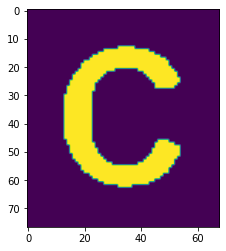

In [9]:
show_img(this_img)